In [49]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
dataset = pd.read_csv("/content/spotify_dataset.csv")
dataset_copy = dataset.copy()
df_cols = dataset.columns

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [52]:
dataset.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [53]:
dataset.head(1)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


In [54]:
dataset['Genre']

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1551                       ['dance pop', 'pop', 'uk pop']
1552             ['sertanejo', 'sertanejo universitario']
1553    ['dance pop', 'electropop', 'pop', 'post-teen ...
1554                       ['brega funk', 'funk carioca']
1555                             ['pop', 'post-teen pop']
Name: Genre, Length: 1556, dtype: object

In [55]:
genre_list = []
def clean_alt_list(list_):
    list_ = list_.replace('[', '')
    list_ = list_.replace(']', '')
    split = list_.split(",")
    for item in split:
      item = item.replace(" '","")
      item = item.replace(" '","")
      item = item.replace("'","")
      genre_list.append(item)
    return genre_list

for i in dataset['Genre']:
  genre_list = clean_alt_list(i)

len(genre_list)

4665

In [56]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

genre_new = boolean_df(dataset['Genre'], genre_list)

In [57]:
genre_new
genre_new = (genre_new== 'TRUE').astype(int)

In [58]:
genre_df = pd.DataFrame(genre_new)

In [64]:
genre_df

,indie rock italiano,italian pop,australian hip hop,pop,uk pop,lgbtq+ hip hop,pop rap,dance pop,puerto rican pop,trap latino,latin,reggaeton,reggaeton colombiano,k-pop,k-pop boy group,canadian pop,post-teen pop,canadian contemporary r&b,gauze pop,indietronica,shiver pop,latin hip hop,dfw rap,melodic rap,rap,house,pop dance,tropical house,uk dance,electropop,colombian pop,,chicago rap,panamanian pop,latin pop,pop argentino,big room,brostep,dutch edm,edm,...,r&b en espanol,pop reggaeton,trap chileno,west coast rap,jazz funk,belgian hip hop,rap belge,r&b brasileiro,rap cearense,trap brasileiro,scandipop,swedish pop,indie r&b,jawaiian,florida rap,acoustic pop,german cloud rap,perreo,christlicher rap,philly rap,indie rockism,german underground rap,k-rap,chicago drill,drill,banda,corrido,norteno,alternative pop rock,minnesota hip hop,albanian hip hop,venezuelan hip hop,meme rap,grime,brega funk,moombahton,pittsburgh rap,new orleans rap,deep german hip hop,turkish trap
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
newdataset = pd.concat([dataset,genre_df], axis=1)

In [66]:
newdataset.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
                            ..
moombahton                   0
pittsburgh rap               0
new orleans rap              0
deep german hip hop          0
turkish trap                 0
Length: 359, dtype: int64

In [67]:
dataset=newdataset

In [68]:
dataset.drop(['Song ID', 'Song Name'],axis=1, inplace=True)

In [69]:
dataset.drop(['Genre'],axis=1, inplace=True)


In [70]:
dataset.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Streams', 'Artist', 'Artist Followers',
       'Release Date', 'Weeks Charted', 'Popularity',
       ...
       'albanian hip hop', 'venezuelan hip hop', 'meme rap', 'grime',
       'brega funk', 'moombahton', 'pittsburgh rap', 'new orleans rap',
       'deep german hip hop', 'turkish trap'],
      dtype='object', length=356)

seeing the percentage of space in each column

In [71]:
dataset['Artist Followers'] = dataset['Artist Followers'].replace(' ', np.nan)
# dataset['Genre'] = dataset['Genre'].replace(' ', np.nan)

dataset['Release Date'] = dataset['Release Date'].replace(' ', np.nan)
dataset['Popularity'] = dataset['Popularity'].replace(' ', np.nan)
dataset['Danceability'] = dataset['Danceability'].replace(' ', np.nan)
dataset['Energy'] = dataset['Energy'].replace(' ', np.nan)
dataset['Loudness'] = dataset['Loudness'].replace(' ', np.nan)
dataset['Speechiness'] = dataset['Speechiness'].replace(' ', np.nan)
dataset['Acousticness'] = dataset['Acousticness'].replace(' ', np.nan)
dataset['Liveness'] = dataset['Liveness'].replace(' ', np.nan)
dataset['Tempo'] = dataset['Tempo'].replace(' ', np.nan)
dataset['Duration (ms)'] = dataset['Duration (ms)'].replace(' ', np.nan)
dataset['Valence'] = dataset['Valence'].replace(' ', np.nan)
dataset['Chord'] = dataset['Chord'].replace(' ', np.nan)

In [72]:
# print(dataset[dataset['Genre'].isnull()].index.tolist())
print(dataset[dataset['Release Date'].isnull()].index.tolist())
print(dataset[dataset['Popularity'].isnull()].index.tolist())
print(dataset[dataset['Danceability'].isnull()].index.tolist())
print(dataset[dataset['Energy'].isnull()].index.tolist())
print(dataset[dataset['Loudness'].isnull()].index.tolist())
print(dataset[dataset['Speechiness'].isnull()].index.tolist())
print(dataset[dataset['Acousticness'].isnull()].index.tolist())
print(dataset[dataset['Liveness'].isnull()].index.tolist())
print(dataset[dataset['Tempo'].isnull()].index.tolist())
print(dataset[dataset['Duration (ms)'].isnull()].index.tolist())
print(dataset[dataset['Valence'].isnull()].index.tolist())
print(dataset[dataset['Chord'].isnull()].index.tolist())

[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]
[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538]


In [73]:
dataset.dropna(inplace=True)

In [74]:
dataset.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Streams                      0
                            ..
moombahton                   0
pittsburgh rap               0
new orleans rap              0
deep german hip hop          0
turkish trap                 0
Length: 356, dtype: int64

In [75]:
dataset['Streams'] # check data haru kun type ma xa

0       48,633,449
1       47,248,719
2       40,162,559
3       37,799,456
4       33,948,454
           ...    
1551     4,630,675
1552     4,623,030
1553     4,620,876
1554     4,607,385
1555     4,595,450
Name: Streams, Length: 1545, dtype: object

In [76]:
dataset['Streams'].replace(',','', regex=True, inplace=True)
dataset['Streams'] = dataset['Streams'].astype(int)

In [77]:
splitted_charting = dataset['Week of Highest Charting'].str.split("-", expand=True)
a = splitted_charting[6].astype(int)
b = splitted_charting[2].astype(int)
c = abs(np.array(a)-np.array(b))
dataset['timecharted'] = c
dataset.drop(['Week of Highest Charting'],axis=1, inplace=True)

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Columns: 356 entries, Index to timecharted
dtypes: int64(341), object(15)
memory usage: 4.2+ MB


In [79]:
dataset['Artist Followers'] = dataset['Artist Followers'].astype(int)
dataset['Popularity'] = dataset['Popularity'].astype(int)
dataset['Danceability'] = dataset['Danceability'].astype(float)
dataset['Energy'] = dataset['Energy'].astype(float)
dataset['Loudness'] = dataset['Loudness'].astype(float)
dataset['Speechiness'] = dataset['Speechiness'].astype(float)
dataset['Acousticness'] = dataset['Acousticness'].astype(float)
dataset['Liveness'] = dataset['Liveness'].astype(float)
dataset['Tempo'] = dataset['Tempo'].astype(float)
dataset['Duration (ms)'] = dataset['Duration (ms)'].astype(int)
dataset['Valence'] = dataset['Valence'].astype(float)

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Columns: 356 entries, Index to timecharted
dtypes: float64(8), int64(344), object(4)
memory usage: 4.2+ MB


scatter plots

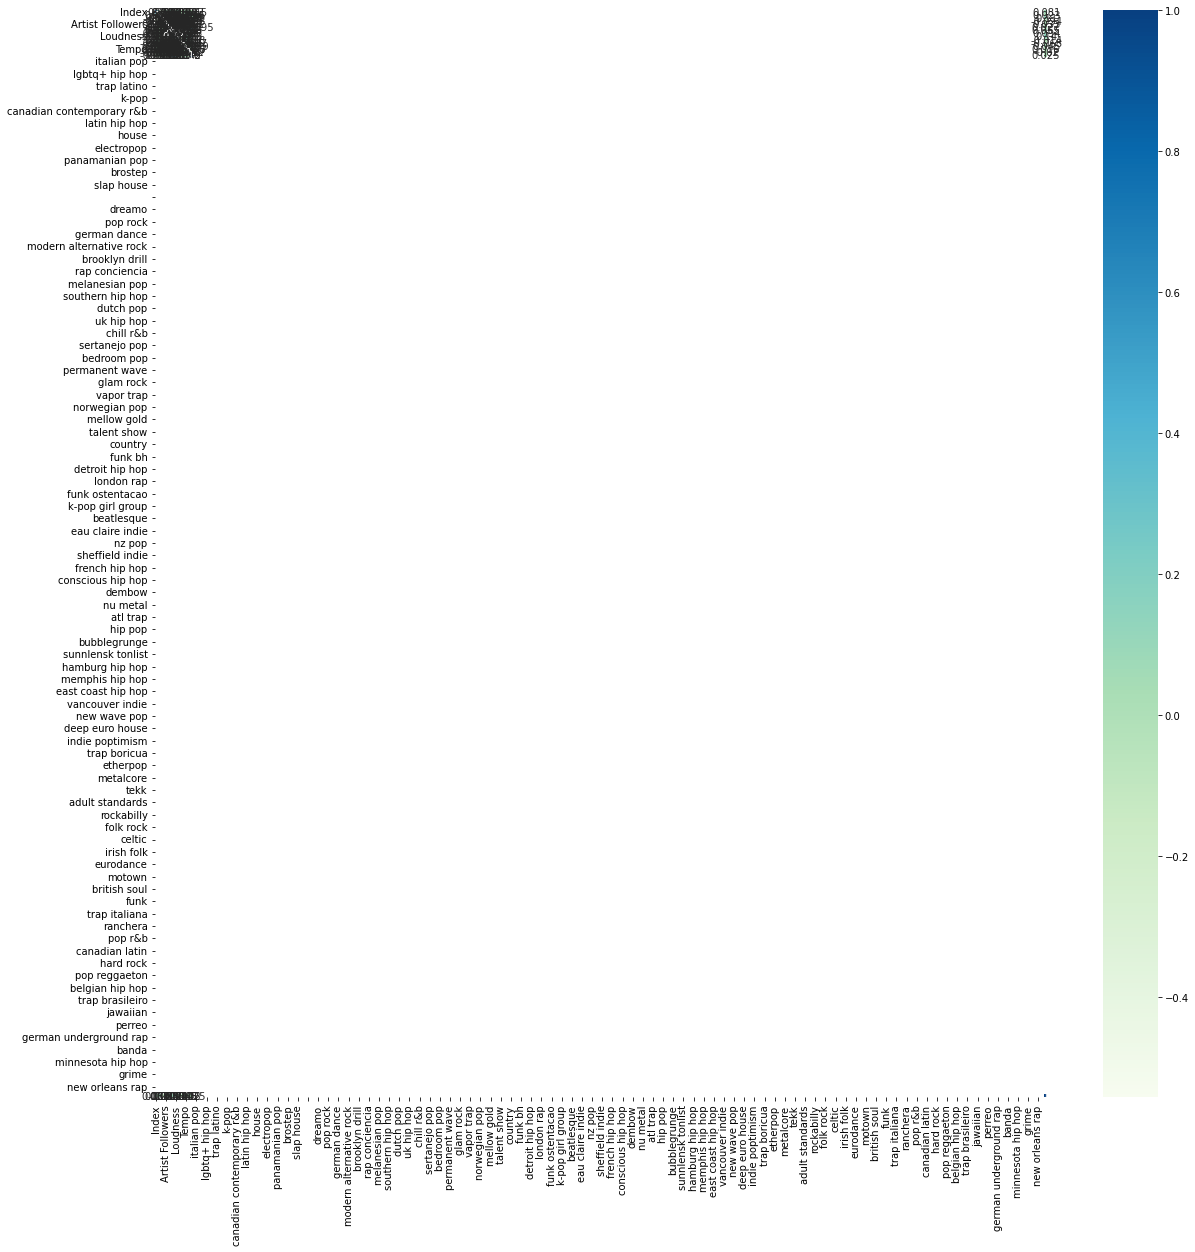

In [81]:
corr=dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="GnBu")

aba correlation bata -ve ako sab delete

In [82]:
dataset.drop(['Index'], axis=1, inplace=True)

In [ ]:
# dataset.drop(['Highest Charting Position','Number of Times Charted','Danceability','Loudness','Speechiness'], axis=1, inplace=True)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Columns: 355 entries, Highest Charting Position to timecharted
dtypes: float64(8), int64(343), object(4)
memory usage: 4.2+ MB


encoding string values

In [84]:
np.unique(dataset['Artist'], return_counts=True) # no eraisng artist and Release Date because there are more than one in some cases

(array(['*NSYNC',
        '13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness, Elams, Solda, Houari',
        '187 Strassenbande, Bonez MC, Frauenarzt',
        '21 Savage, Metro Boomin', '24kGoldn', '347aidan',
        '5 Seconds of Summer', '6ix9ine', 'A Boogie Wit da Hoodie',
        'A$AP Ferg', 'AC/DC', 'ATB, Topic, A7S', 'AURORA', 'Adele',
        'Agust D', 'Alan Walker, Ava Max', 'Alec Benjamin',
        'Alex Rose, Rafa Pabön', 'Alex Rose, Rauw Alejandro',
        'Alexander 23', 'Ali Gatie', 'Alida, Robin Schulz',
        'Alok, Mc Don Juan, Dj GBR', 'Andy Williams', 'Anitta',
        'Anitta, Lexa, Luísa Sonza', 'Anne-Marie',
        'Anne-Marie, KSI, Digital Farm Animals', 'Anne-Marie, Little Mix',
        'Anne-Marie, Niall Horan', 'Ant Saunders', 'Anuel AA',
        'Anuel AA, Bad Bunny',
        'Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin',
        'Anuel AA, Ozuna', 'Apache 207', 'Arcangel, Bad Bunny',
        'Arcangel, Sech, Romeo Santos', 'Arctic Monkeys', 'Ariana 

In [85]:
# Genre_encoder = LabelEncoder()
# dataset['Genre'] = Genre_encoder.fit_transform(dataset['Genre'])

Release_Date_encoder = LabelEncoder()
dataset['Release Date'] = Release_Date_encoder.fit_transform(dataset['Release Date'])

week_of_highest_charting_encoder = LabelEncoder()
dataset['Artist'] = week_of_highest_charting_encoder.fit_transform(dataset['Artist'])

chord_encoder = LabelEncoder()
dataset['Chord'] = chord_encoder.fit_transform(dataset['Chord'])

chord_encoder = LabelEncoder()
dataset['Weeks Charted'] = chord_encoder.fit_transform(dataset['Weeks Charted'])


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Columns: 355 entries, Highest Charting Position to timecharted
dtypes: float64(8), int64(347)
memory usage: 4.2 MB


In [87]:
dataset.head(1)

,Highest Charting Position,Number of Times Charted,Streams,Artist,Artist Followers,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,indie rock italiano,italian pop,australian hip hop,pop,uk pop,lgbtq+ hip hop,pop rap,dance pop,puerto rican pop,trap latino,latin,reggaeton,reggaeton colombiano,k-pop,k-pop boy group,canadian pop,post-teen pop,canadian contemporary r&b,gauze pop,indietronica,shiver pop,latin hip hop,...,pop reggaeton,trap chileno,west coast rap,jazz funk,belgian hip hop,rap belge,r&b brasileiro,rap cearense,trap brasileiro,scandipop,swedish pop,indie r&b,jawaiian,florida rap,acoustic pop,german cloud rap,perreo,christlicher rap,philly rap,indie rockism,german underground rap,k-rap,chicago drill,drill,banda,corrido,norteno,alternative pop rock,minnesota hip hop,albanian hip hop,venezuelan hip hop,meme rap,grime,brega funk,moombahton,pittsburgh rap,new orleans rap,deep german hip hop,turkish trap,timecharted
0,1,8,48633449,469,3377762,112,711,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


checking for normalizing data


In [88]:
for col in dataset.columns:
  dataset[col] = (dataset[col] - dataset[col].min()) / (dataset[col].max() - dataset[col].min())


Split data into training and testing


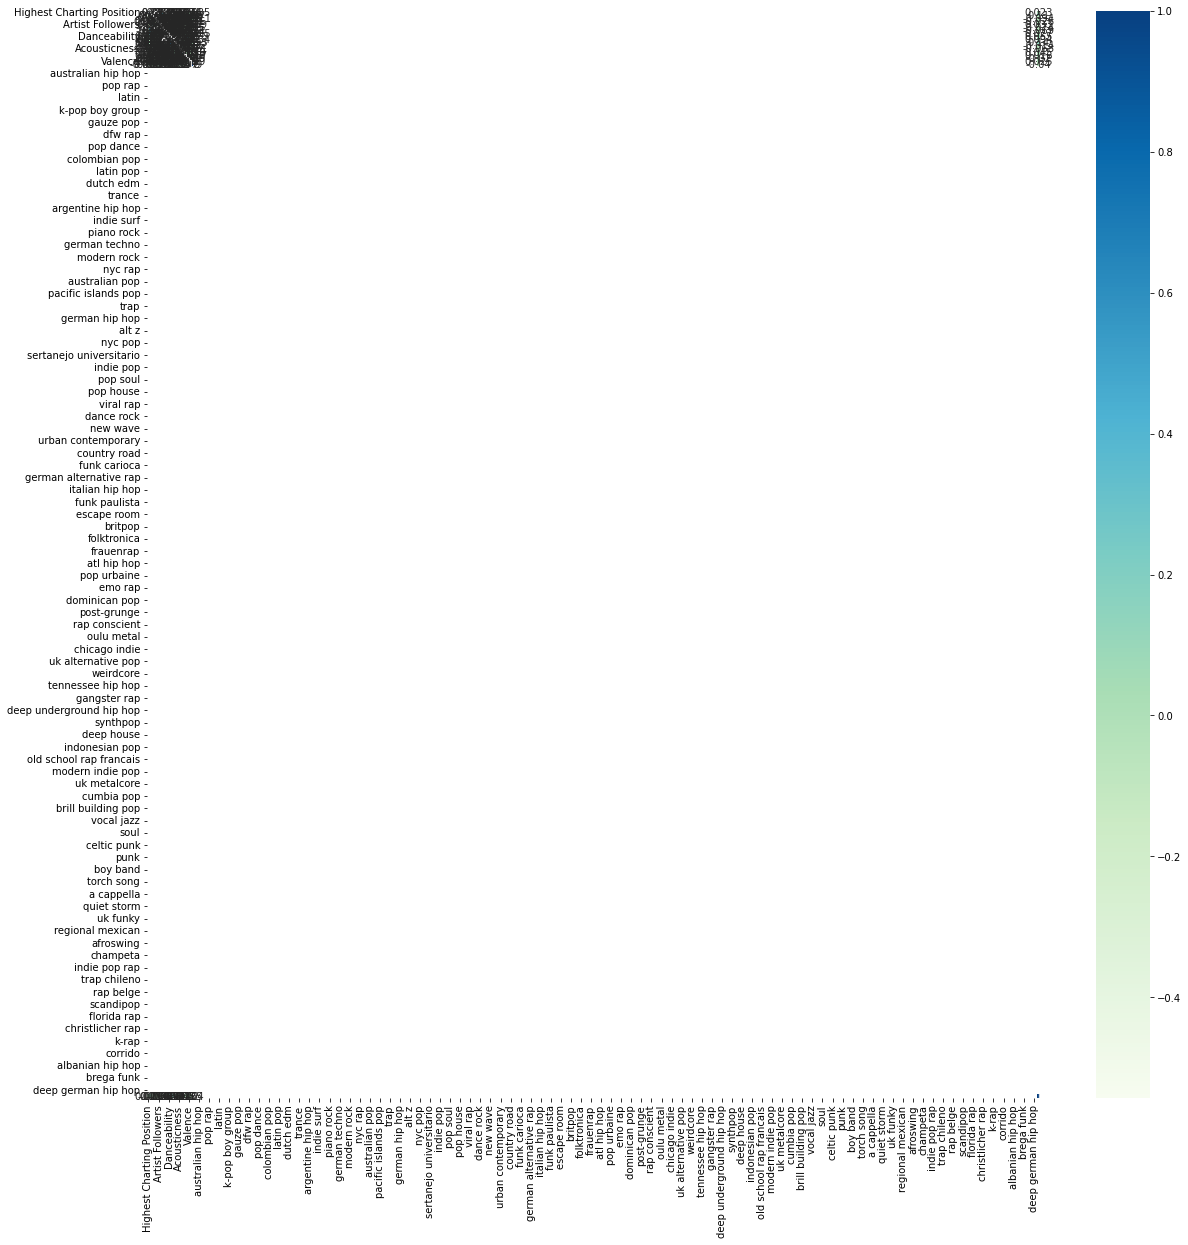

In [89]:
corr=dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [90]:
dataset_unnormalized = dataset

In [91]:
dataset.isnull().sum()

Highest Charting Position       0
Number of Times Charted         0
Streams                         0
Artist                          0
Artist Followers                0
                             ... 
pittsburgh rap               1545
new orleans rap              1545
deep german hip hop          1545
turkish trap                 1545
timecharted                     0
Length: 355, dtype: int64

In [92]:
Y = dataset['Streams']
dataset.drop(['Streams'], axis=1, inplace=True)
X = dataset

In [93]:
Y.shape

(1545,)

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [95]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1158, 354) (1158,) (387, 354) (387,)


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
print(linear_model.score(X_train,Y_train))

predicted = linear_model.predict(X_test)
predicted_actual_dataframe = pd.DataFrame({"predicted": predicted, "actual": (Y_test)})
print(predicted_actual_dataframe)

r2_score(Y_test, predicted)


In [ ]:
second_model = RandomForestRegressor(n_estimators=100)
second_model.fit(X_train,Y_train)
second_model_pred = second_model.predict(X_test)
r2_score(Y_test, second_model_pred)



In [ ]:

random_regressor_model = RandomForestRegressor(criterion='squared_error', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=42, verbose=0, warm_start=False)
random_regressor_model.fit(X_train,Y_train)
random_regressor_model_pred = random_regressor_model.predict(X_test)
r2_score(Y_test, random_regressor_model_pred)
#model
# hyperparameter
#k value change
#features
#loop value 
#gradient boost

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
n_scores.mean()

# print('MAE: %.3f (%.3f)' % (mean(n_scores), n_scores.mean))

In [ ]:
X.head()

In [ ]:
Y.shape

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1)
scores.mean()

In [ ]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
random_regressor_model = RandomForestRegressor(criterion='squared_error', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False)
r2 = []
for train_index, test_index in kf.split(X):
      # print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
      random_regressor_model.fit(X_train,Y_train)
      random_regressor_model_pred = random_regressor_model.predict(X_test)
      r2.append(r2_score(Y_test, random_regressor_model_pred))
print(sum(r2)/len(r2))

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
print("score",ridge_model.score(X_train, Y_train))
ridge_predict = ridge_model.predict(X_test)
r2_score(Y_test, ridge_predict)

In [ ]:
lasso_model = Lasso()

lasso_model.fit(X_train, Y_train)
print("score",lasso_model.score(X_train, Y_train))
lasso_predict = lasso_model.predict(X_test)
r2_score(Y_test, lasso_predict)

In [ ]:
svr_model = SVR()

svr_model.fit(X_train, Y_train)
print("score",svr_model.score(X_train, Y_train))
svr_predict = svr_model.predict(X_test)
r2_score(Y_test, svr_predict)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['a', 'b', 'c','d','e','f','g','h','i','j'])

In [ ]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    return cross_val_score(model, x, y, cv=cv, scoring='r2').mean()
    # R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    print("name",input_scores(name, model, X, Y))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X, Y)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'weight1.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
DNN_predict=NN_model.predict(X_test)

In [ ]:
r2_score(Y_test, DNN_predict)